In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from identification import *

plt.style.use('default')

In [4]:
df_theta_hat_ed  = pd.read_csv('../data/theta_hat_ed_emax_111.csv', header=None)

In [5]:
theta_hat_ed = np.array(df_theta_hat_ed[0], ndmin=2).T

In [6]:
print(theta_hat_ed)

[[-7.15561968e-01]
 [ 3.70256867e-01]
 [ 1.69949091e-04]
 [ 3.12006096e-05]
 [ 1.40570779e+02]]


In [7]:
def magnitude(x):
    return np.max(np.abs(x))

In [8]:
omega = np.zeros(1000)
omega[0] = 0.1
for i in range(omega.size-1):
    omega[i+1] = 1.005642*omega[i]

In [9]:
Ts = 0.1024
T1 = 100
T2 = -1
mag_ed = np.zeros(omega.shape)
for i in range(omega.size):
    w = omega[i]
    t = np.arange(0,int(2*np.pi*500))*Ts
    u = np.cos(w*t)
    y_hat_ed = estimate_output_ed(u,u,theta_hat_ed)
    mag_ed[i] = magnitude(y_hat_ed[T1:T2])

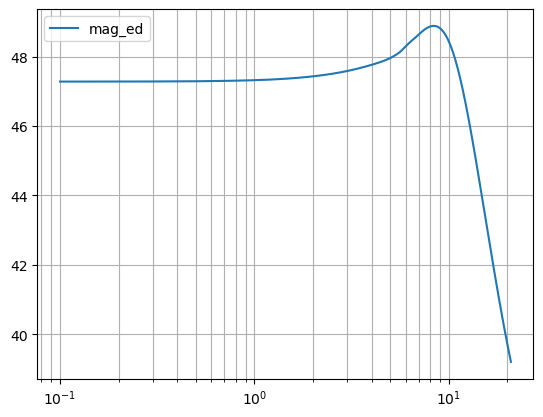

In [10]:
plt.grid(True, 'both')
plt.xscale('log')
plt.plot(omega[:-50],20*np.log10(mag_ed)[:-50], label='mag_ed')
plt.legend()

In [11]:
df_theta_hat_e_ed  = pd.read_csv('../data/theta_hat_e_ed_n11_111v.csv', header=None)

In [12]:
theta_hat_e_ed = np.array(df_theta_hat_e_ed[0], ndmin=2).T

In [13]:
print(theta_hat_e_ed)

[[ -0.6773646 ]
 [  0.56550919]
 [ 28.64942775]
 [-27.31024892]]


In [14]:
Ts = 0.1024
T1 = 100
T2 = -1
mag_e = np.zeros(omega.shape)
for i in range(omega.size):
    w = omega[i]
    t = np.arange(0,int(2*np.pi*500))*Ts
    u = np.cos(w*t)
    e_hat = estimate_output(u,u,theta_hat_e_ed,2)
    mag_e[i] = magnitude(e_hat[T1:T2])

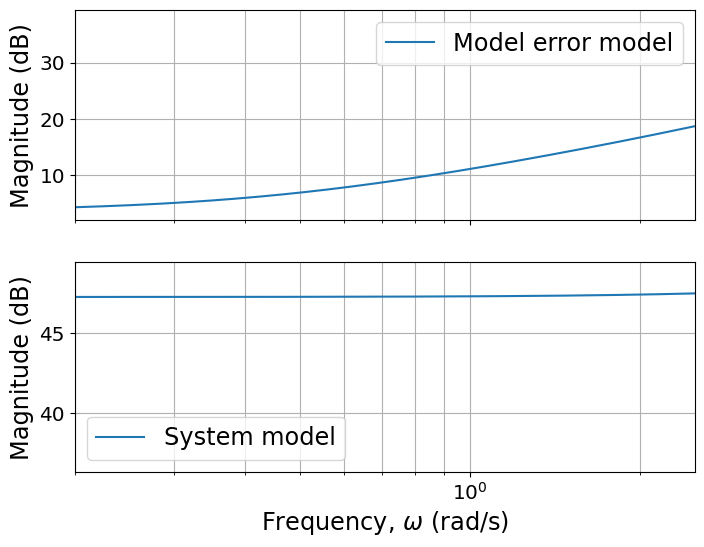

In [15]:
fig, axs = plt.subplots(2, 1, figsize=[8,6], sharex=True)
axs[0].grid(True, 'both')
axs[1].grid(True, 'both')

#axs[0].xt()
axs[1].set_xlabel('Frequency, $\omega$ (rad/s)', fontsize='xx-large')
axs[0].set_ylabel('Magnitude (dB)', fontsize='xx-large')
axs[1].set_ylabel('Magnitude (dB)', fontsize='xx-large')

axs[0].tick_params(labelsize='x-large')
axs[1].tick_params(labelsize='x-large')
axs[0].set_xlim([0.2,2.5])


axs[0].semilogx(omega,20*np.log10(mag_e ),label='Model error model' )
axs[1].semilogx(omega,20*np.log10(mag_ed),label='System model')
axs[0].legend(fontsize='xx-large')
axs[1].legend(fontsize='xx-large')

fig.savefig(fname='../figures/bode_erro_system.png')